In [3]:
pip install xlrd

     |████████████████████████████████| 96 kB 415 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

     |████████████████████████████████| 9.9 MB 4.1 MB/s eta 0:00:01     |████▏                           | 1.3 MB 4.1 MB/s eta 0:00:03     |█████████▍                      | 2.9 MB 4.1 MB/s eta 0:00:02��█████████████████▊      | 8.0 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 46.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 2.7 MB/s eta 0:00:01    |█▌                              | 491 kB 2.7 MB/s eta 0:00:04     |████▌                           | 1.4 MB 2.7 MB/s eta 0:00:04
     |████████████████████████████████| 1.1 MB 15.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 41.0 MB/s eta 0:00:01     | 266 kB 41.0 MB/s eta 0:00:01     |██████████████████▊             | 1.7 MB 41.0 MB/s eta 0:00:01     |█████████████████████████▊      | 2.4 MB 41.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn==0.22

     |████████████████████████████████| 7.0 MB 1.5 kB/s eta 0:00:01     |███▊                            | 808 kB 1.6 MB/s eta 0:00:04     |████████                        | 1.8 MB 1.6 MB/s eta 0:00:04     |██████████▉                     | 2.4 MB 1.6 MB/s eta 0:00:03     |████████████▏                   | 2.7 MB 1.6 MB/s eta 0:00:03     |█████████████                   | 2.9 MB 1.6 MB/s eta 0:00:03�█▌       | 5.4 MB 1.6 MB/s eta 0:00:02
     |████████████████████████████████| 27.4 MB 31.2 MB/s eta 0:00:01   |▍                               | 368 kB 6.2 MB/s eta 0:00:05     |▉                               | 757 kB 6.2 MB/s eta 0:00:05     |███▍                            | 2.9 MB 6.2 MB/s eta 0:00:04     |██████                          | 5.1 MB 6.2 MB/s eta 0:00:04     |█████████████▍                  | 11.4 MB 8.2 MB/s eta 0:00:02     |█████████████▉                  | 11.8 MB 8.2 MB/s eta 0:00:02
     |████████████████████████████████| 303 kB 30.6 MB/s eta 0:00:01
Note: you may nee

In [15]:
pip install openpyxl

     |████████████████████████████████| 243 kB 3.5 MB/s eta 0:00:01
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=5b765cfb2f283a7be831015ddc6df0b1d63fa2c5ba51f579a0f38d80f4509e9a
  Stored in directory: /home/jovyan/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install k_means_constrained

  Using cached k-means-constrained-0.5.2.tar.gz (557 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached ortools-8.2.8710-cp37-cp37m-manylinux1_x86_64.whl (14.2 MB)
  Using cached protobuf-3.15.8-cp37-cp37m-manylinux1_x86_64.whl (1.0 MB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Created wheel for k-means-constrained: filename=k_means_constrained-0.5.2-cp37-cp37m-linux_x86_64.whl size=1470816 sha256=0e441df65190a5494a0d3a16fc6381bf7c5a5976402494b531737b2d6fba5f8b
  Stored in directory: /home/jovyan/.cache/pip/wheels/6e/90/e7/9164231d6675be08f62c4a76debd4a0c26bcfd408be143c66e
Successfully built k-means-constrained
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [5]:
df=pd.read_excel(r'Geolocation.xlsx',sheet_name='Dayawati Geo')
temp_df=df[['PartyMasterCode','outlet_latitude','outlet_longitude']]
temp_df.dropna(inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
temp_df.shape

(7258, 3)

In [8]:
df[df['outlet_latitude']==df['outlet_latitude'].max()]

,PartyMasterCode,PartyName,BeatName,outlet_latitude,outlet_longitude
7231,D-P46264,RAHUL STORES (BRR3)-P,HUL2-BIREN ROY ROAD-3,22.714828,88.366558


## Method 2: Clustering with equal cluster size

In [9]:
from k_means_constrained import KMeansConstrained

In [12]:
temp1_df=df[['PartyMasterCode','outlet_latitude','outlet_longitude']]
temp1_df.dropna(inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
temp1_df.shape

(7258, 3)

In [16]:
kmeans_1 = KMeansConstrained(size_min=20, size_max=27, init ='k-means++',n_clusters=270, max_iter=10)
kmeans_1.fit(temp1_df[temp1_df.columns[1:3]]) # Compute k-means clustering.
temp1_df['cluster_label'] = kmeans_1.fit_predict(temp1_df[temp1_df.columns[1:3]])
temp1_df.head(10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PartyMasterCode,outlet_latitude,outlet_longitude,cluster_label
0,D-P22329,22.487487,88.189528,42
1,D-P41337,22.551768,88.244618,230
2,D-P36429,22.523658,88.245412,236
3,D-P39072,22.551235,88.246307,230
4,D-P39087,22.551242,88.247103,230
5,D-P39082,22.549393,88.248058,230
6,D-P39047,22.550965,88.248370,230
7,D-P39012,22.550252,88.248383,230
8,D-P50453,22.502409,88.248736,45
9,D-P39052,22.550870,88.249180,230


In [17]:
centers = kmeans_1.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans_1.predict(temp1_df[temp1_df.columns[1:3]]) # Labels of each point

In [23]:
temp1_df.to_excel("Beats_plan.xlsx")

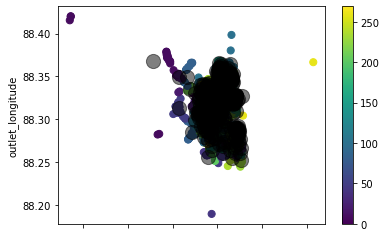

In [22]:
temp1_df.plot.scatter(x = 'outlet_latitude', y = 'outlet_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)